In [ ]:
import os
from PIL import Image,ImageFile
import matplotlib.pyplot as plt
ImageFile.LOAD_TRUNCATED_IMAGES = True
import random

In [ ]:
!7z x dataset_hist_structures_1.zip -y


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,96 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 131955131 bytes (126 MiB)

Extracting archive: dataset_hist_structures_1.zip
 34% 4096 Open              --
Path = dataset_hist_structures_1.zip
Type = zip
Physical Size = 131955131

  0%     11% 844 - dataset_hist_structures/Dataset_ . ress/10533199613_33185b0135_m.jpg                                                                                26% 1319 - dataset_hist_structures/Dataset . is_191208_04_Fuite_en_Egypte.jpg                         

In [ ]:
base_dir = "dataset_hist_structures/"
test_dir = "dataset_hist_structures/Dataset_test/Dataset_test_original_1478"
train_dir = "dataset_hist_structures/Stuctures_Dataset"


dataset_hist_structures/Stuctures_Dataset/column
['5850794407_67030193b3_n.jpg', '5209381005_58c3af8d35_m.jpg', '2316266840_88e656698d.jpg']
dataset_hist_structures/Stuctures_Dataset/altar
['13495103733_07414d9b43_m.jpg', '3405259922_1d580857d4_m.jpg', '8749651276_3ebfb35ab3_m.jpg']
dataset_hist_structures/Stuctures_Dataset/dome(outer)
['27168575690_61368a5ac6_n.jpg', '362625046_83bada3570.jpg', '3914094405_223fd428ec_n.jpg']
dataset_hist_structures/Stuctures_Dataset/stained_glass
['3603139155_165dc43961_m.jpg', '17336149366_8e2f2d7bec_n.jpg', '12887335133_d5ee158be5_m.jpg']
dataset_hist_structures/Stuctures_Dataset/vault
['5559888754_2f248c5966_n.jpg', '1248016991_2353e886ec_m.jpg', '5844026243_d154eb1776_m.jpg']
dataset_hist_structures/Stuctures_Dataset/.DS_Store
dataset_hist_structures/Stuctures_Dataset/flying_buttress
['2178726997_cb71336a2f_n.jpg', '2302717659_cfd5e875a8_m.jpg', 'Le_Mont_Saint-Michel_en_1948_(9).jpg']
dataset_hist_structures/Stuctures_Dataset/gargoyle
['1278383044

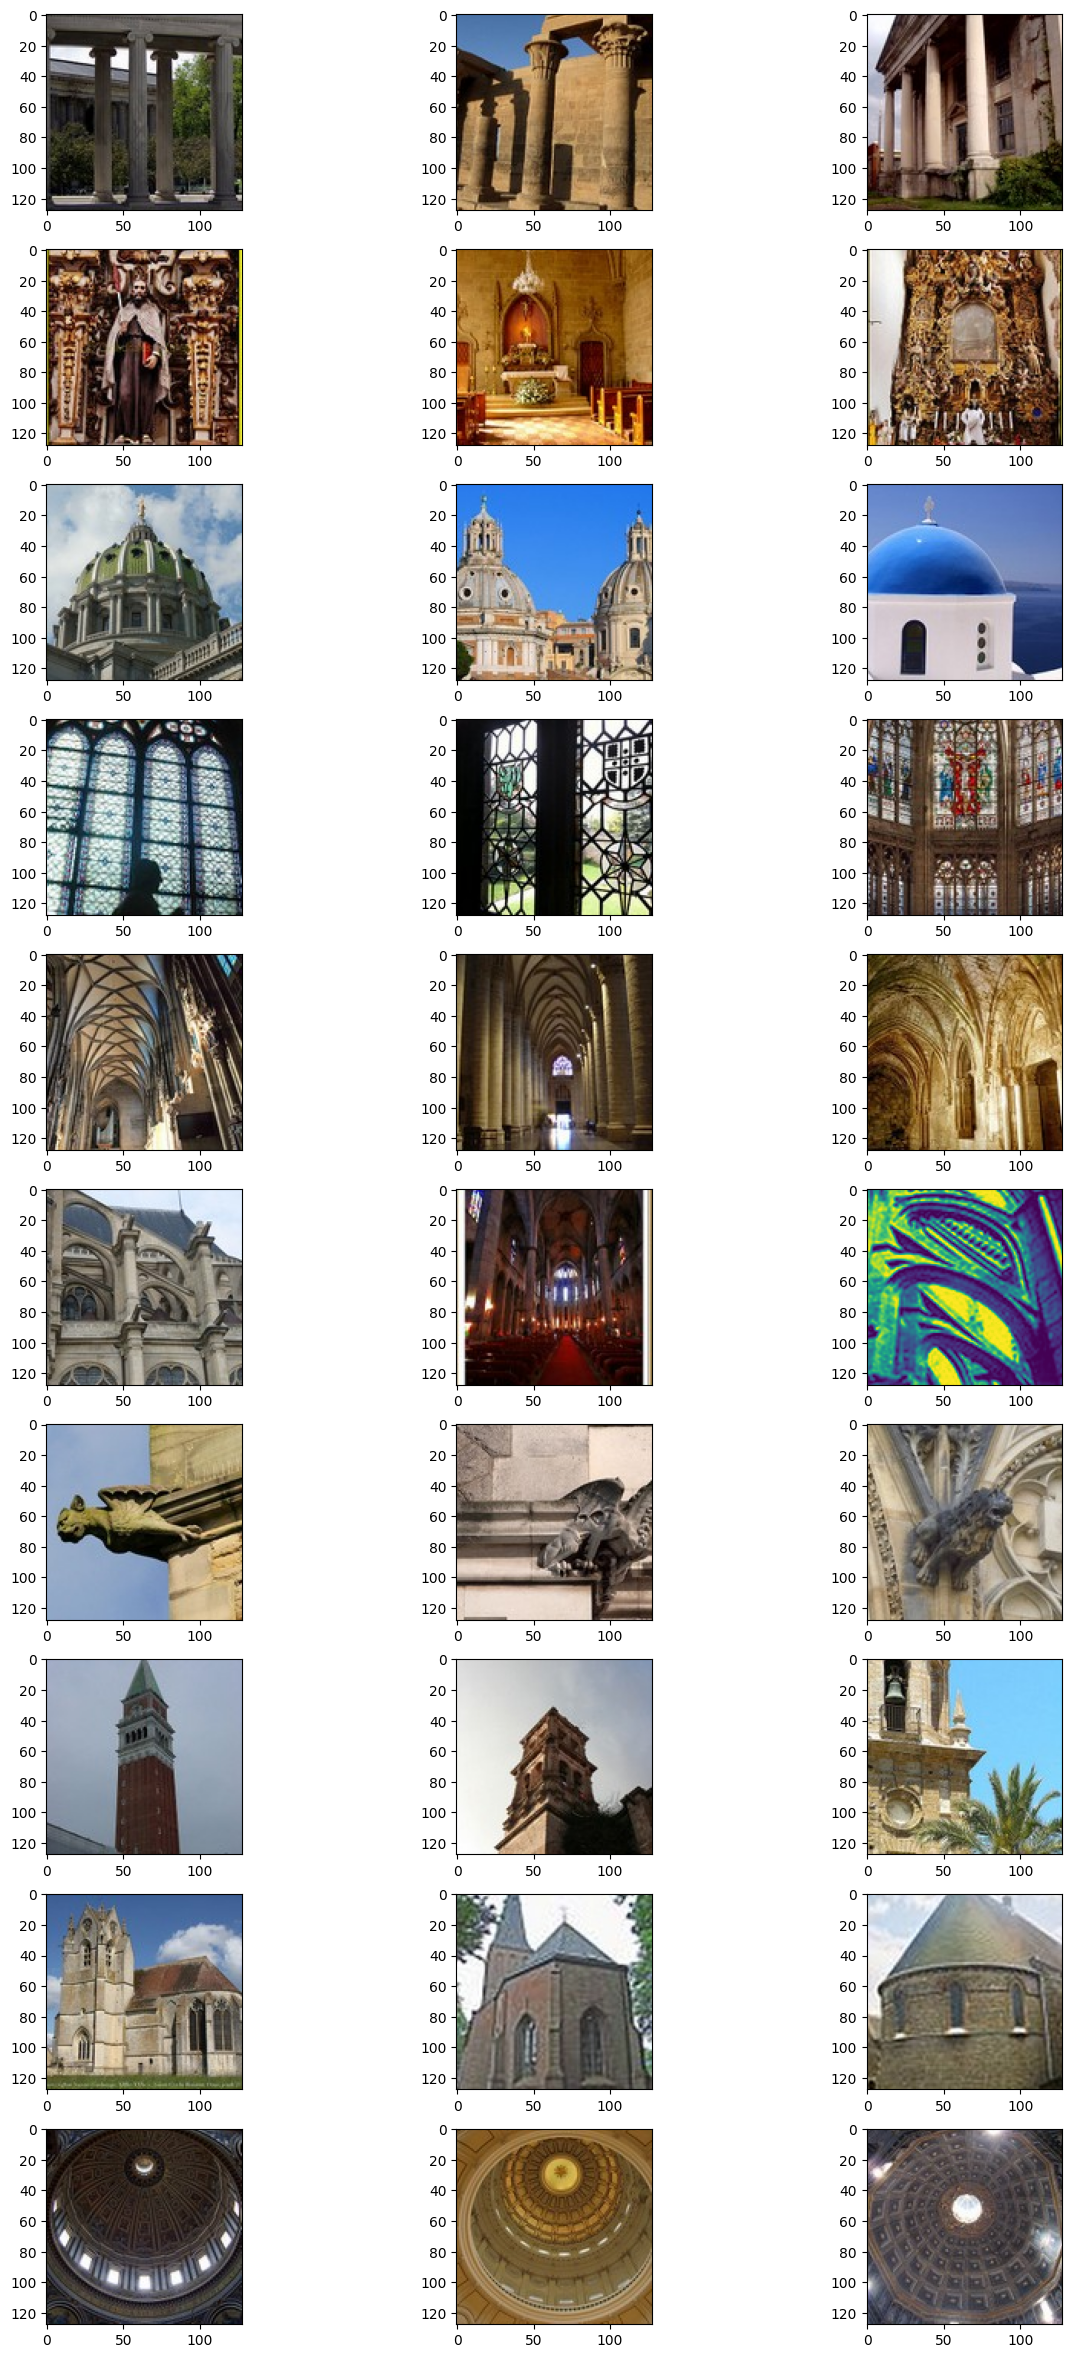

In [ ]:
fig,axes = plt.subplots(10,3,figsize=(15,30))
subfolders = os.listdir(train_dir)
row_index = 0
for folder in subfolders:
    folder = os.path.join(train_dir,folder)
    print(folder)
    if(os.path.isdir(folder)):
      Images = (os.listdir(folder))
      sample_images = random.sample(Images,3)
      print(sample_images)
      for i,img_name in enumerate(sample_images):
        img_path = os.path.join(folder,img_name)
        img = Image.open(img_path)
        col_index = i%3

        axes[row_index,col_index].imshow(img)
      row_index+=1


In [ ]:
image_dir = test_dir

for filename in os.listdir(image_dir):
         try:
             dir = os.path.join(image_dir, filename)
             for i in os.listdir(dir):
              img_path = os.path.join(dir,i)
              img = Image.open(img_path)
              #print(img.verify())
         except (IOError, SyntaxError) as e:
             os.remove(img_path)
             print(f"Corrupt file or unsupported format: {img_path}")

Corrupt file or unsupported format: dataset_hist_structures/Dataset_test/Dataset_test_original_1478/stained_glass/9d1de848-bfd8-40e1-9686-0f8aba896655.jpg
Corrupt file or unsupported format: dataset_hist_structures/Dataset_test/Dataset_test_original_1478/bell_tower/ren_tmp_jpg.bat


In [ ]:
image_dir = train_dir

for filename in os.listdir(image_dir):
         try:
             dir = os.path.join(image_dir, filename)
             for i in os.listdir(dir):
              img_path = os.path.join(dir,i)
              img = Image.open(img_path)
              #print(img.verify())
         except (IOError, SyntaxError) as e:
             os.remove(img_path)
             print(f"Corrupt file or unsupported format: {img_path}")

Corrupt file or unsupported format: dataset_hist_structures/Stuctures_Dataset/vault/7272064774_805562a42a_m.jpg


In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.callbacks import EarlyStopping

In [ ]:
image_width,image_height = 224,224

In [ ]:
num_classes = len(os.listdir(train_dir))-1

In [ ]:
base_model = VGG16(weights = 'imagenet',include_top = False,input_shape = (image_width,image_height,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense (256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation = "softmax"))

In [ ]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size = (image_width,image_height),batch_size = 200,class_mode = 'categorical')
train_generator = train_datagen.flow_from_directory(train_dir,target_size = (image_width,image_height),batch_size = 200,class_mode = 'categorical')

Found 1476 images belonging to 10 classes.
Found 10234 images belonging to 10 classes.


In [ ]:
early_stopping = EarlyStopping(monitor = "val_loss",patience = 3,restore_best_weights = True)

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.samples//train_generator.batch_size,
                    epochs = 2,
                    validation_data = test_generator,
                    validation_steps=test_generator.samples//test_generator.batch_size,
                    callbacks = early_stopping)

Epoch 1/2
51/51 [==============================] - 184s 4s/step - loss: 1.2156 - accuracy: 0.7213 - val_loss: 0.4431 - val_accuracy: 0.8629
Epoch 2/2
51/51 [==============================] - 184s 4s/step - loss: 0.2862 - accuracy: 0.9139 - val_loss: 0.3396 - val_accuracy: 0.8893


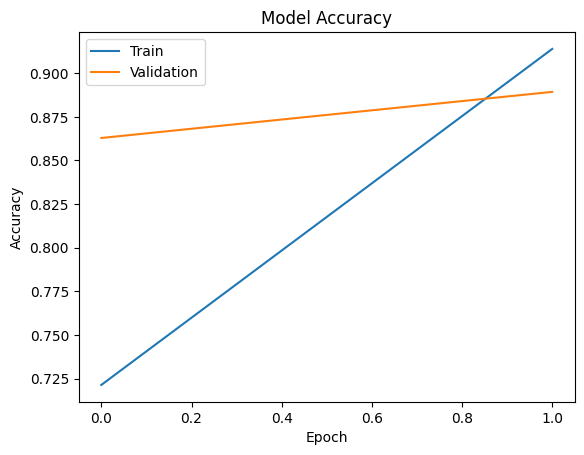

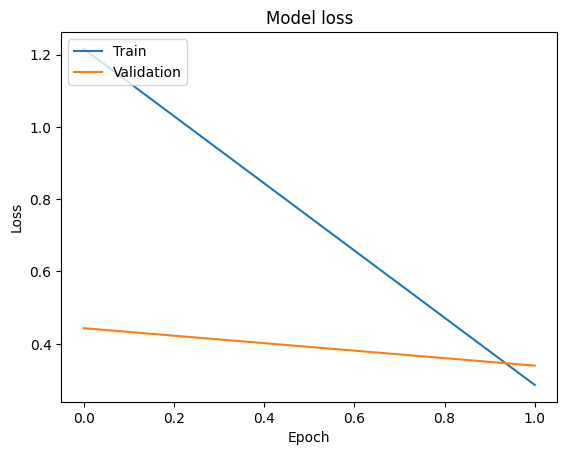

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()